In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import gamma

%matplotlib inline

In [2]:
np.random.seed(2022)

# 1. High Dimensional Data Analysis

Write a script to do the following:

- __Hypersphere Volume:__ Plot the volume of a unit hypersphere as a function of dimension. Plot for d=1,⋯,50

- __Hypersphere Radius:__ What value of radius would one need to maintain a hypersphere volume of 1 with increasing d. Plot this value for d=1,⋯,100

- __Nearest Neighbors:__ Assume we have a unit hypercube centered at (0.5,⋯,0.5). Generate n=10000 uniformly random points in dd dimensions, in the range (0,1) in each dimension. Find the ratio of the nearest and farthest point from the center of the space. Also store the actual distance of the nearest dn and farthest df points from the center. Plot these value for d=1,⋯,100.

- __Fraction of Volume:__ Assume we have a hypercube of edge length l=2 centered at the origin (0,0,⋯,0). Generate n=10,000 points uniformly at random for increasing dimensionality d=1,⋯,100. Now answer the following questions:

- Plot the fraction of points that lie inside the largest hypersphere that can be inscribed inside the hypercube with increasing d. After how many dimensions does the fraction goes to essentially zero?

- Plot the fraction of points in the thin shell of width ϵ=0.01 inside the hypercube (i.e., the difference between the outer hypercube and inner hypercube, or the thin shell along the boundaries). What is the trend that you see? After how many dimensions does the fraction of volume in the thin shell go to 100% (use binary search or increase the dimenionality in steps of 10 to answer this. You may use maximum dimensions of upto 2000, and you may use a threshold of 0.0001 to count the volume as essentially being 1 in the shell, i.e., a volume of 0.9999 can be taken to be equal to 1 for finding the smallest dimension at which this happens).

## Hypersphere Volume

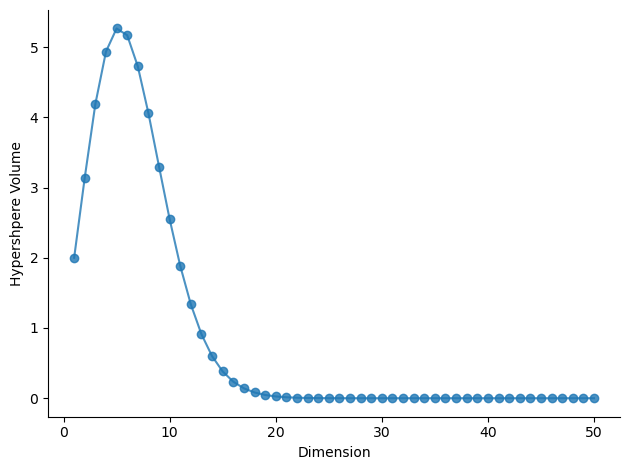

In [3]:
d = np.arange(1, 51)
sphere_volume = np.power(np.pi, d/2) / gamma(d/2 + 1)

fig, ax = plt.subplots()
ax.plot(d, sphere_volume, '-o', alpha=0.8)
ax.set_xlabel('Dimension')
ax.set_ylabel('Hypershpere Volume')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

## Hypersphere Radius

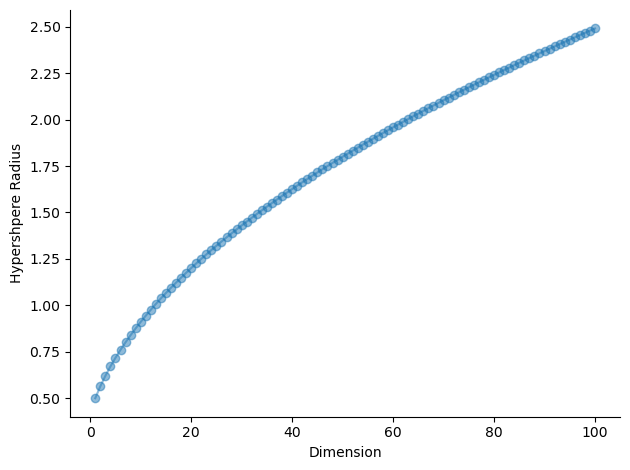

In [4]:
d = np.arange(1, 101)
unit_sphere_volume = np.power(np.pi, d/2) / gamma(d/2 + 1)
radius = np.exp(-np.log(unit_sphere_volume) / d)

fig, ax = plt.subplots()
ax.plot(d, radius, '-o', alpha=0.5)
ax.set_xlabel('Dimension')
ax.set_ylabel('Hypershpere Radius')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

## Nearest Neighbors

In [5]:
def nearest_farthest_distance(d):
    center = np.ones(d) * 0.5
    points = np.random.uniform(size=(10000, d))
    distance = np.sqrt(((points - center) ** 2).sum(axis=1))
    nearest_distance = distance.min()
    farthest_distance = distance.max()
    
    return nearest_distance, farthest_distance, nearest_distance / farthest_distance

In [6]:
d = np.arange(1, 101)
neighbors = np.vectorize(nearest_farthest_distance)
nearest, farthest, ratio = neighbors(d)

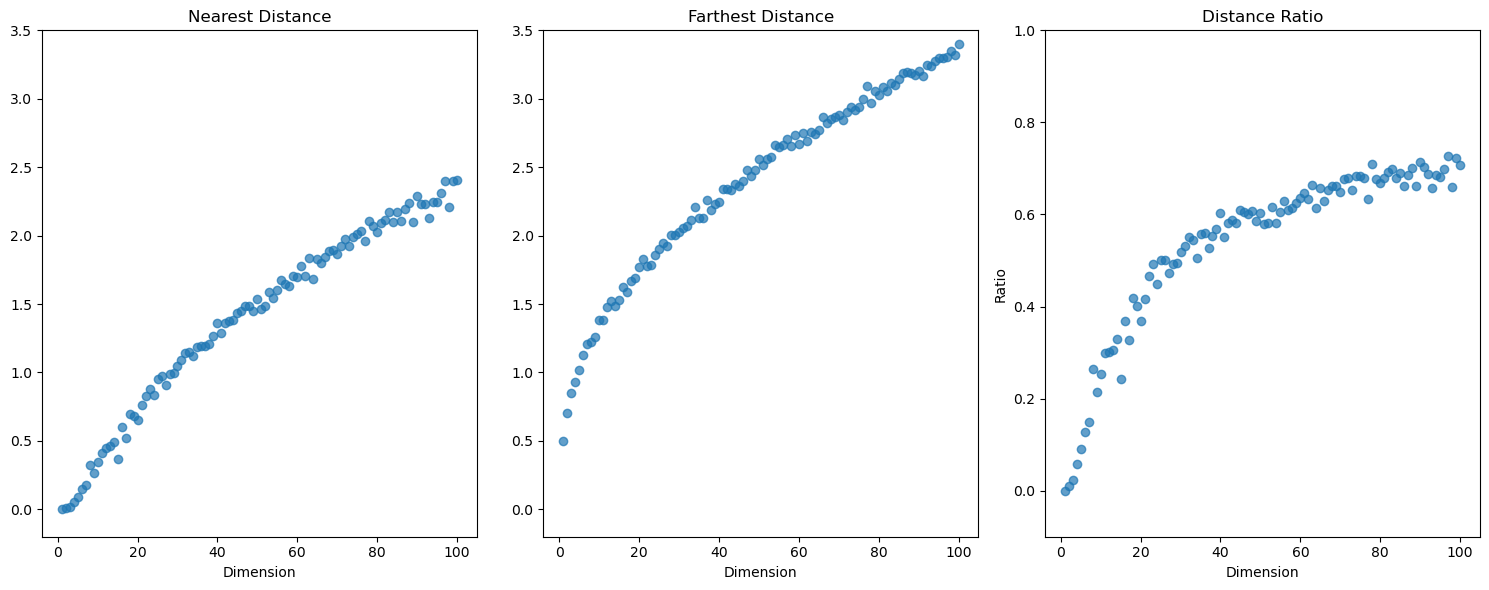

In [7]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15, 6))

axes[0].scatter(d, nearest, alpha=0.7)
axes[0].set(title='Nearest Distance', xlabel='Dimension', ylim=(-0.2, 3.5))

axes[1].scatter(d, farthest, alpha=0.7)
axes[1].set(title='Farthest Distance', xlabel='Dimension', ylim=(-0.2, 3.5))

axes[2].scatter(d, ratio, alpha=0.7)
axes[2].set(title='Distance Ratio', xlabel='Dimension', ylabel='Ratio', ylim=(-0.1, 1))

plt.tight_layout()

## Fraction of Volume

In [8]:
def inside_hypersphere(d):
    points = np.random.uniform(low=-1, high=1, size=(10000, d))
    distance = np.linalg.norm(points, axis=1)
    return (distance < 1).mean()

d = np.arange(1, 101)
fraction_sphere = np.vectorize(inside_hypersphere)
fractions = fraction_sphere(d)

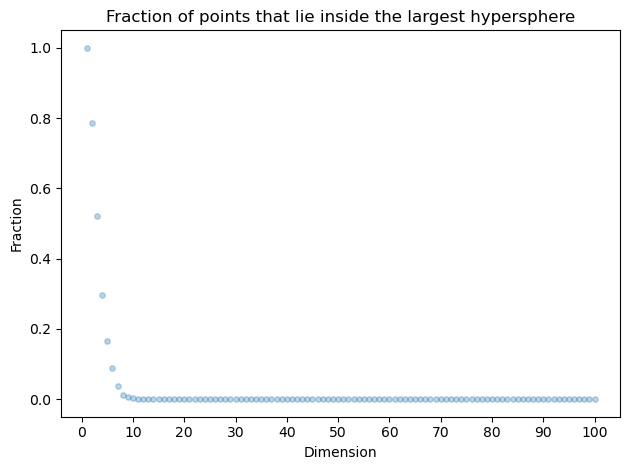

In [9]:
plt.scatter(d, fractions, alpha=0.3, s=15)
plt.ylabel('Fraction')
plt.xlabel('Dimension')
plt.title('Fraction of points that lie inside the largest hypersphere')
plt.xticks(range(0, 110, 10))
plt.tight_layout()

In [10]:
epsilon = 0.01

def inside_thin_shell(d):
    points = np.random.uniform(low=-1, high=1, size=(10000, d))
    in_innercube = (points.max(axis=1) <= 1 - epsilon) & (points.min(axis=1) >= epsilon)
    return 1 - in_innercube.mean()

d = np.arange(1, 101)
fraction_thinshell = np.vectorize(inside_thin_shell)
fractions = fraction_thinshell(d)

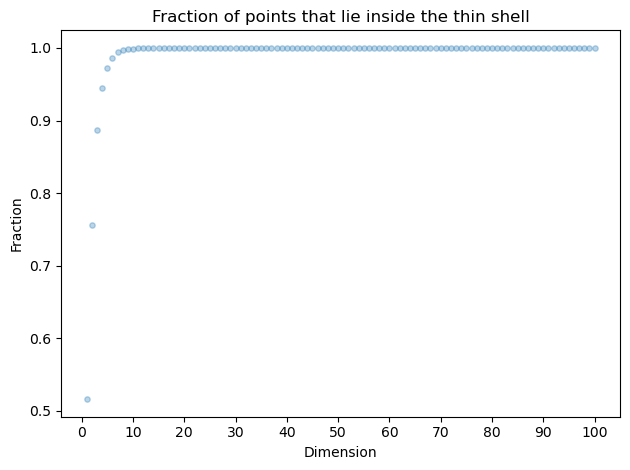

In [11]:
plt.scatter(d, fractions, alpha=0.3, s=15)
plt.ylabel('Fraction')
plt.xlabel('Dimension')
plt.title('Fraction of points that lie inside the thin shell')
plt.xticks(range(0, 110, 10))
plt.tight_layout()

# 2. Diagonals in High Dimensions

In [12]:
def plot_angles(d):
    first_diagonal = np.random.choice([-1.0, 1.0], size=(10000, d))
    second_diagonal = np.random.choice([-1.0, 1.0], size=(10000, d))

    cosine_sim = np.diag(first_diagonal @ second_diagonal.T) / (
        np.linalg.norm(first_diagonal, axis=1) * np.linalg.norm(second_diagonal, axis=1)
    )

    angles = np.arccos(cosine_sim) / np.pi * 180
    
    sns.histplot(x=angles, kde=True, stat='proportion')
    plt.xticks(range(30, 165, 15))
    plt.title(f"d = {d}")

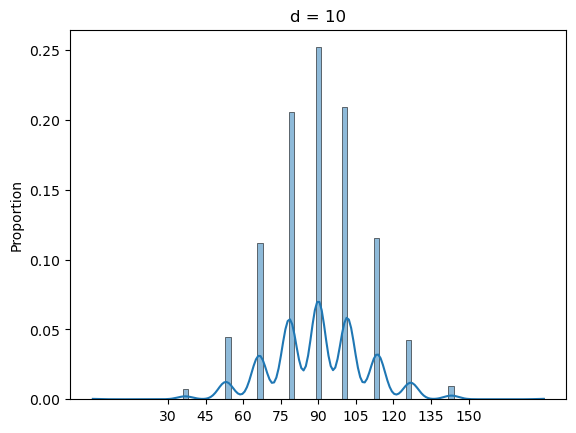

In [13]:
plot_angles(10)

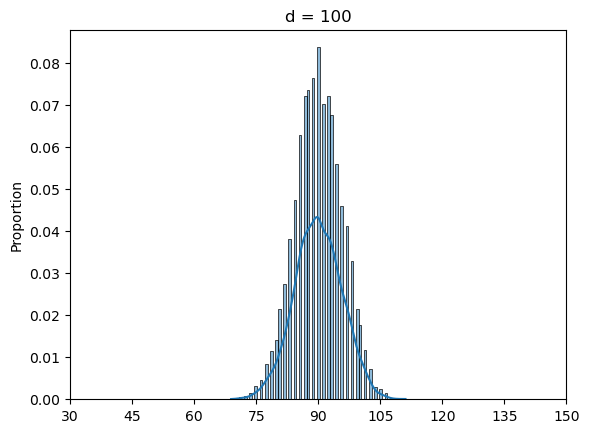

In [14]:
plot_angles(100)

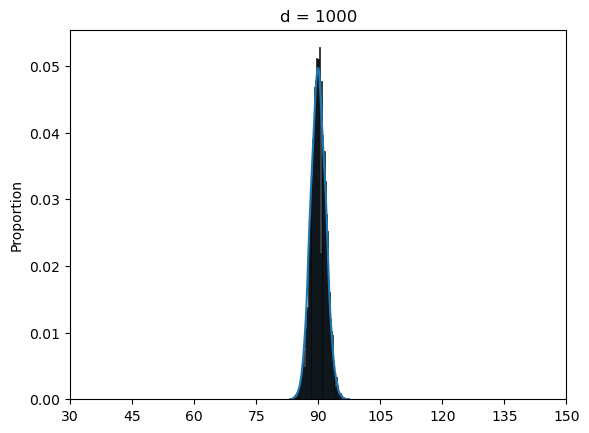

In [15]:
plot_angles(1000)